In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import utils
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [26]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of classes (0-9 digits)
num_classes = 10

# batch size and number of epochs
batch_size = 128
epochs = 10

In [31]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [32]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [33]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])



In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 9216)              0         
                                                                 
 dense_20 (Dense)            (None, 128)               1179776   
                                                      

In [35]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 10s 19ms/step - loss: 2.3008 - accuracy: 0.1047 - val_loss: 2.2732 - val_accuracy: 0.1588
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 2.2533 - accuracy: 0.1585 - val_loss: 2.2203 - val_accuracy: 0.1751
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 2.1927 - accuracy: 0.1956 - val_loss: 2.1496 - val_accuracy: 0.1963
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 2.1089 - accuracy: 0.2311 - val_loss: 2.0476 - val_accuracy: 0.2270
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 1.9951 - accuracy: 0.2820 - val_loss: 1.9117 - val_accuracy: 0.2903
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 1.8533 - accuracy: 0.3478 - val_loss: 1.7500 - val_accuracy: 0.4013
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 1.6950 - accuracy: 0.4352 - val_loss: 1.5759 - val_accuracy: 0.518

In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate

# input image dimensions
img_rows, img_cols = 28, 28

# number of classes (0-9 digits)
num_classes = 10

# batch size and number of epochs
batch_size = 128
epochs = 10

# load data
path = untar_data(URLs.MNIST)
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=parent_label,
    item_tfms=Resize((img_rows, img_cols)),
    batch_tfms=Normalize()
)

dls = datablock.dataloaders(path, bs=batch_size)

# define model
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.25),
    Flatten(),
    nn.Linear(7*7*64, 128), nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, num_classes),
)

# define learner
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

# train model
learn.fit_one_cycle(epochs)


epoch,train_loss,valid_loss,accuracy,time


: 

: 

In [1]:
from fastai.vision.all import *

# Load MNIST data
path = untar_data(URLs.MNIST_SAMPLE)

# Prepare data
dls = ImageDataLoaders.from_folder(path)

# Create a CNN
learn = cnn_learner(dls, resnet18, metrics=accuracy)

# Train the model
learn.fine_tune(1)


/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.301311,0.162692,0.943572,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.046455,0.032805,0.989696,00:13


Suggested learning rate: 0.0020892962347716093


epoch,train_loss,valid_loss,accuracy,time
0,0.722775,0.501758,0.838900,01:00


epoch,train_loss,valid_loss,accuracy,time
0,0.143199,0.092177,0.972600,01:04
1,0.088550,0.055225,0.982500,01:04
2,0.070183,0.045050,0.986000,01:05
3,0.050746,0.039498,0.987300,01:05
4,0.035441,0.037980,0.988800,01:05
5,0.024187,0.028526,0.991200,01:05
6,0.012065,0.030385,0.990700,01:04
7,0.006321,0.026753,0.993000,01:05
8,0.002826,0.025708,0.992600,01:04
9,0.001565,0.028125,0.992400,01:04


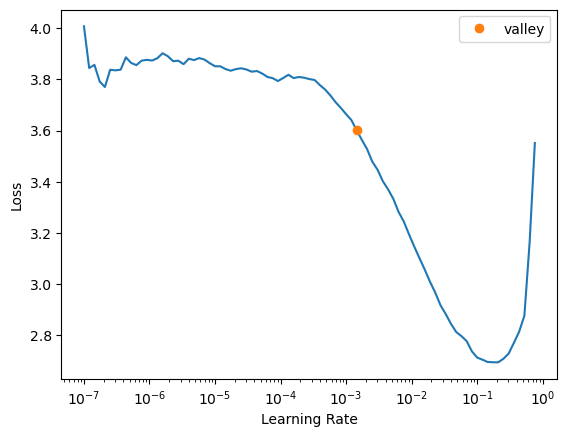

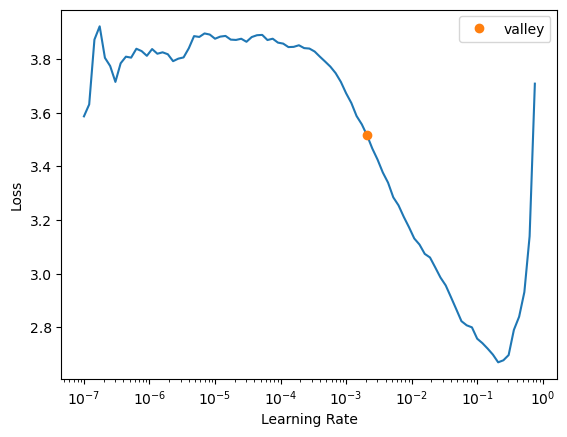

In [2]:
from fastai.vision.all import *

# Load MNIST data
path = untar_data(URLs.MNIST)

# Prepare data
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label)

dls = datablock.dataloaders(path)

# Create a CNN
learn = cnn_learner(dls, resnet18, metrics=accuracy, n_in=1)  # Set n_in=1 for grayscale images

# Find the optimal learning rate
learn.lr_find()
# Get suggested learning rate
suggested_lr = learn.lr_find().valley
print(f"Suggested learning rate: {suggested_lr}")
# Train the model
learn.fine_tune(10, base_lr=suggested_lr)


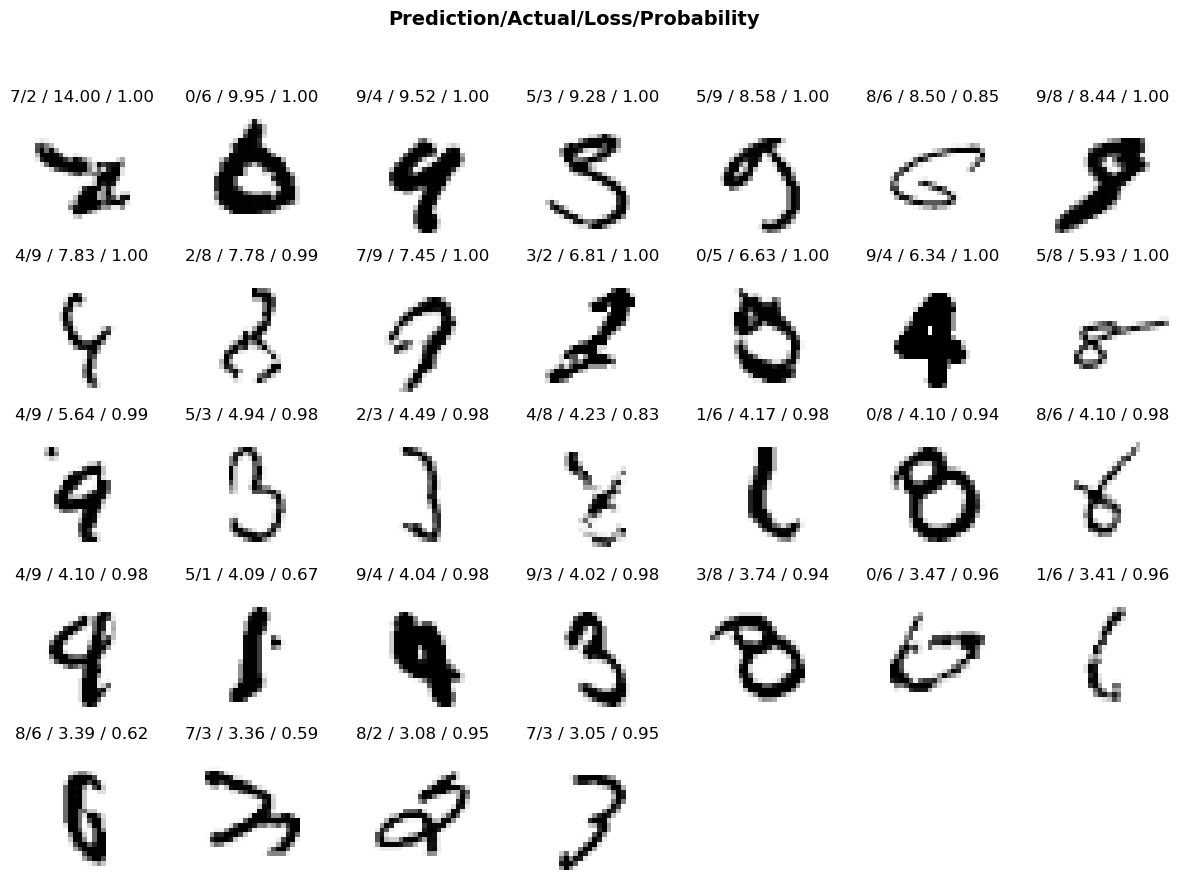

In [5]:
# Plot top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(32, figsize=(15,10))

# 숫자OCR

/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kimsy/anaconda3/envs/mi39/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Suggested learning rate: 0.0004786300996784121


epoch,train_loss,valid_loss,accuracy,time
0,3.946616,2.980503,0.088235,00:00


epoch,train_loss,valid_loss,accuracy,time
0,2.763101,2.832656,0.088235,00:01
1,2.717863,2.457935,0.176471,00:00
2,2.364931,1.973876,0.294118,00:00
3,1.980426,1.592102,0.441176,00:00
4,1.642000,1.353738,0.588235,00:00
5,1.403332,1.210130,0.617647,00:00
6,1.213643,1.124449,0.676471,00:00
7,1.055912,1.153435,0.676471,00:00
8,0.931261,1.193727,0.588235,00:00
9,0.833220,1.295393,0.647059,00:00


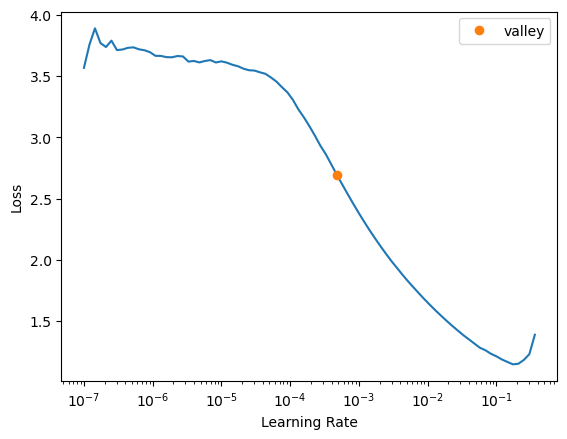

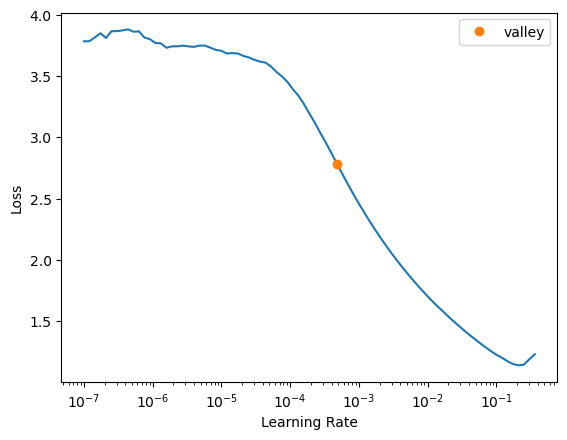

In [16]:
from fastai.vision.all import *

# Specify the path where your training images are located
path = "/Users/kimsy/DataScience/OCR/ocr_number"

# Define a function to label the images based on their parent folder
def label_func(x): return x.parent.name

# Prepare the data
datablock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(),
    get_y=label_func)

dls = datablock.dataloaders(path)

# Create a CNN
learn = cnn_learner(dls, resnet50, metrics=accuracy)

# Find the optimal learning rate
learn.lr_find()

# Get suggested learning rate
suggested_lr = learn.lr_find().valley

print(f"Suggested learning rate: {suggested_lr}")

# Train the model
learn.fine_tune(10, base_lr=suggested_lr)




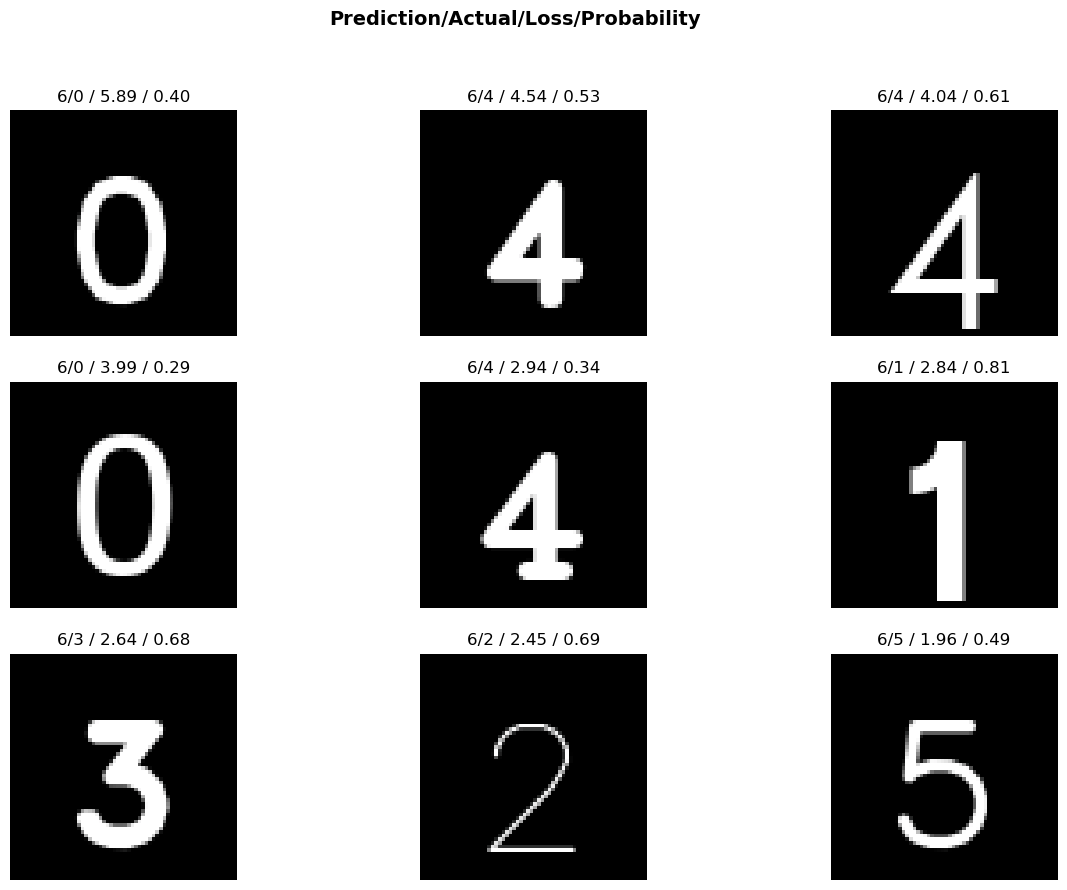

In [17]:
# Plot top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

In [18]:
# Load the image
img = PILImageBW.create('test2.png')

# Convert to grayscale and resize if necessary
# You might need to adjust the size depending on your specific image
img = img.convert('L').resize((28, 28))

# Split the image into individual digits
# This is a bit trickier and might require custom code depending on how your image looks
# For now, let's assume the image is a single digit
digits = [img]

# Classify each digit
for digit in digits:
    pred_class, pred_idx, outputs = learn.predict(digit)
    print(f"Predicted class: {pred_class}")


Predicted class: 1
